# Power Plants Around the World
*by Roman Gelman*

My project will focus on power. Everyone today wants clean energy, but not many people ever think about where energy comes from: where it's made, how it's made, how clean it is, and how much of it is made. I want to dive deep into those details, and possibly answer a question or two (or more?) about power generation on our planet.


I think this topic is very interesting, due to our current situation where clean energy is being pushed harder than ever. It would be intriguing to see how power is generated around the world.


Some questions I aim to answer are:

- What's the most commonly used fuel in power plants?

- Which country generates the most energy in the world?

- Which country generates the least energy in the world?

- What type of power plant generates the most power?

- How much of the world's power plants are "green" or "clean"?

- Which country generates the "greenest" or "cleanest" power?


I will be using the "Global Power-Plants" dataset I found on Kaggle.

- The dataset has the following features:

- country code (object) - short version of 'country'

- country (object) - country in which a power plant resides

- name of powerplant (object) - official name of power plant facility

- capacity in MW (float64) - total capacity in megawatts of power plant

- latitude (float64) - latitude coordinate of power plant

- longitude (float64) - longitude coordinate of power plant

- primary_fuel (object) - fuel primarily used to generate power

- secondary fuel (object) - secondary fuel used to generate power

- other_fuel 1 (object) - other fuel used to generate power

- other_fuel 2 (object) - other fuel used to generate power

- start date (float64) - when the power station first started working

- owner of plant (object) - official owner of power station

- geolocation_source (object) - where geolocation data was taken

- generation_gwh_2020 (float64) - gigawatt-hours generated in 2020

- generation_data_source (object) - where power generation data was taken

- estimated_generation_gwh_2020 (float64) - estimated gigawatt-hours generated in 2020


Before deciding on this dataset for my final project, I looked at some datasets for songs, books, movies, stocks, etc. but couldn't really think of any truly interesting questions that they could answer.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('dark_background') # Pretty dark theme for seaborn/matplotlib

In [2]:
power = pd.read_csv('powerplants.csv') # Load in csv file

- List below are the features of our dataset

In [3]:
power.dtypes

country code                      object
country                           object
name of powerplant                object
capacity in MW                   float64
latitude                         float64
longitude                        float64
primary_fuel                      object
secondary fuel                    object
other_fuel 1                      object
other_fuel 2                      object
start date                       float64
owner of plant                    object
geolocation_source                object
generation_gwh_2020              float64
generation_data_source            object
estimated_generation_gwh_2020    float64
dtype: object

In [4]:
power.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80


- Looking at the head and tail of our dataset, it becomes clear that **some columns probably won't be used.**
- We won't drop them, because they don't seem to do any harm in existing

# Questions to ask:
- What's the most commonly used fuel in power plants?

- Which country generates the most energy in the world?

- Which country generates the least energy in the world?

- What type of power plant generates the most power?

- How much of the world's power plants are "green" or "clean"?

- Which country generates the "greenest" or "cleanest" power?

In [5]:
power.describe()

,capacity in MW,latitude,longitude,start date,generation_gwh_2020,estimated_generation_gwh_2020
count,34936.000000,34936.000000,34936.000000,17447.000000,9659.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,423.922436,716.443378
std,489.636072,22.638603,78.405850,23.397835,1698.506485,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,-780.339000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2.751500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,11.530000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,122.781498,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,31920.368000,82810.770000


<AxesSubplot:>

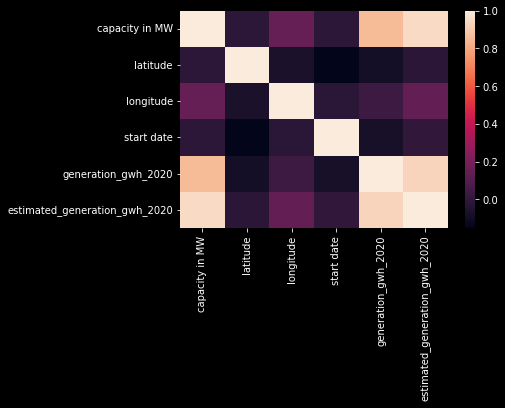

In [6]:
sns.heatmap(power.corr())

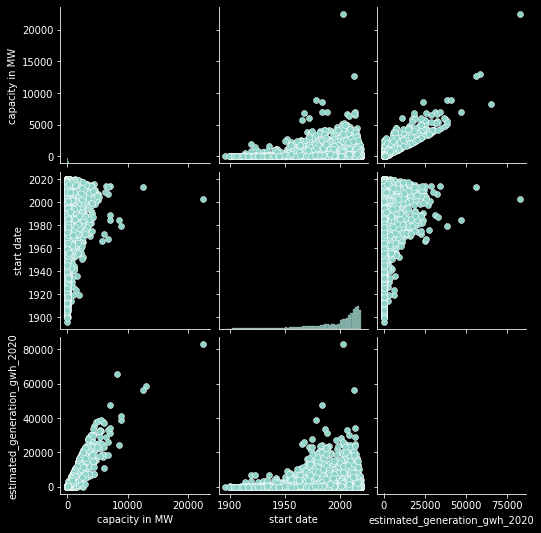

In [7]:
sns.pairplot(data=power.drop(['latitude', 'longitude', 'generation_gwh_2020'], axis=1))

- Maximum capacity and power generation has increased through time, but it seems that a majority are made to older standards, and only a select few are actually as "powerful" as can be.
- Capacity and generation have a pretty direct relationship; power plants with larger capacity tend to generate more than those with smaller capacity.
- One could probably predict the generation output of a power plant given the capacity of it using linear regression.

<AxesSubplot:xlabel='primary_fuel', ylabel='estimated_generation_gwh_2020'>

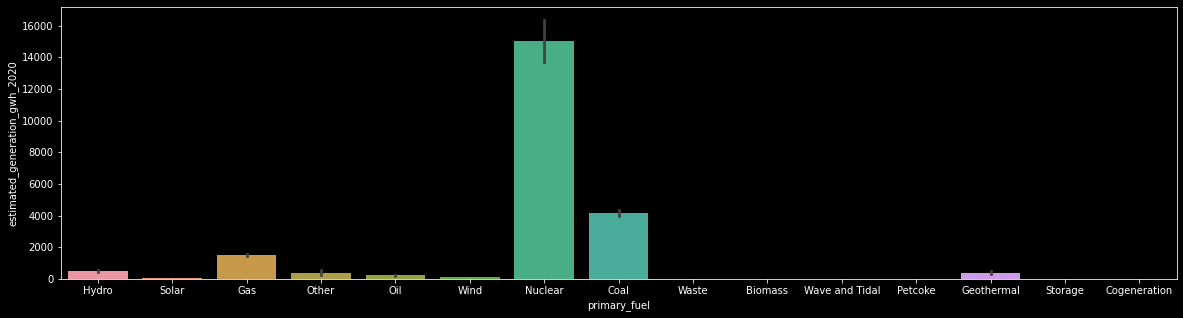

In [8]:
plt.figure(figsize=(20,5))
sns.barplot(data=power, x='primary_fuel', y='estimated_generation_gwh_2020')

- Nuclear and coal produce siginificantly more power than any other fuel type, but is that because they're the most used?

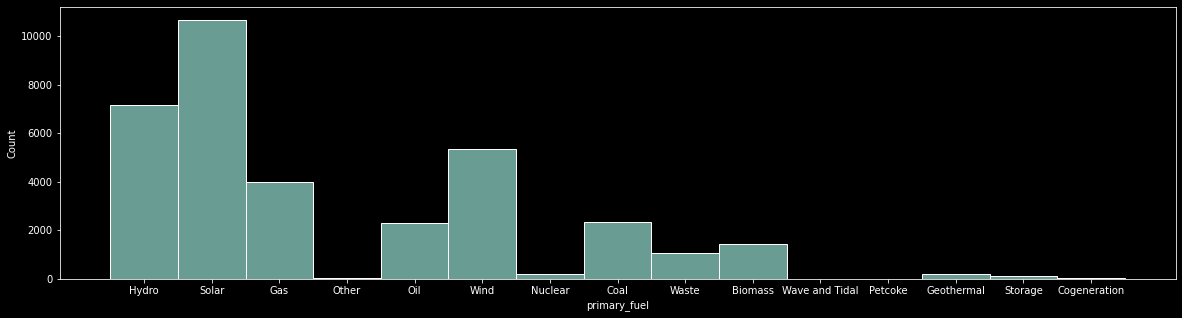

In [9]:
plt.figure(figsize=(20,5))
sns.histplot(data=power, x='primary_fuel');

- Surprisingly, solar power is the most common, with hydro and wind following closely. This is good!
Nuclear, on the other hand, is one of the least common. But it seems to have produced more power than any other type combined!
As many experts believe, this data shows that nuclear power is the most efficient type of power by a significant margin.
I just proved that nuclear power is the most efficient using Data Science! I think that's really cool.

In [10]:
power.groupby('country')['estimated_generation_gwh_2020'].sum().sort_values(ascending=False)

country
China                       6193117.75
United States of America    4653165.24
India                       1434479.65
Japan                        998572.01
Russia                       979376.03
                               ...    
Lebanon                           0.00
Guyana                            0.00
Guinea-Bissau                     0.00
Djibouti                          0.00
Gambia                            0.00
Name: estimated_generation_gwh_2020, Length: 167, dtype: float64

- Here we can see the China has generated the most power, with the USA coming in at second place
- There are many countries that generate nothing.

# What counts as "clean" energy?
- For this project, we'll say that hydro, solar, wind, "wave and tidal", geothermal, and cogeneration.
- I will include nuclear because of it's significant efficiency.
- Petcoke, though more green than regular petroleum, is still a byproduct of the oil industry.

In [11]:
power.shape

(34936, 16)

In [12]:
clean = power[power['primary_fuel'].isin(['Hydro', 'Solar', 'Wind', 'Nuclear', 'Wave and Tidal', 'Geothermal', 'Cogeneration'])]
clean.shape

(23600, 16)

- There are 34,936 power plants in the world.
- There are 23,600 "green" power plants in the world.

In [13]:
23_600 / 34_936 * 100

67.55209525990382

- 67% of power plants are "clean" or "green", which is good!

In [14]:
clean.groupby('country')['estimated_generation_gwh_2020'].sum().sort_values(ascending=False)

country
United States of America    1540489.45
China                       1353433.98
Canada                       486522.95
France                       470659.13
Japan                        410557.91
                               ...    
Cape Verde                       10.99
Suriname                          9.81
Bahrain                           9.76
Saint Lucia                       5.97
Antarctica                        0.00
Name: estimated_generation_gwh_2020, Length: 149, dtype: float64

- The USA has produced the largest amount of clean energy!

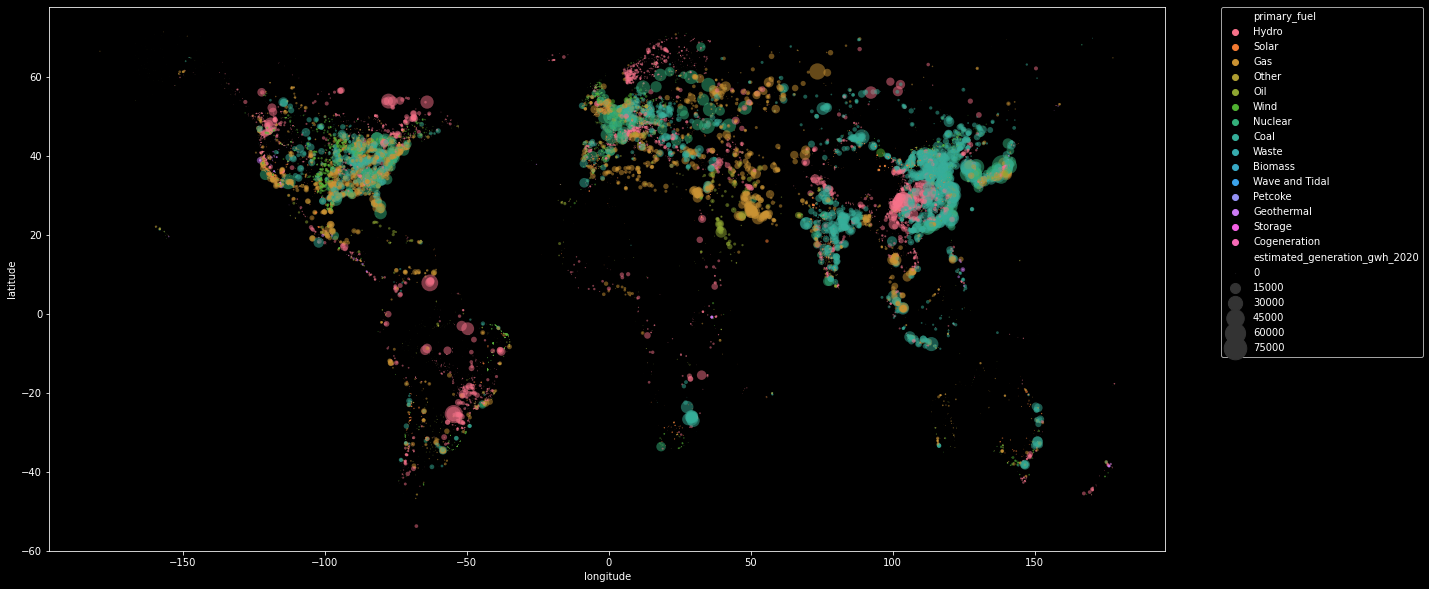

In [15]:
plt.figure(figsize=(20,10))
minsize = power['capacity in MW'].min() / 40
maxsize = power['capacity in MW'].max() / 40
sns.scatterplot(x = 'longitude', y = 'latitude', data = power, alpha = 0.5, size = 'estimated_generation_gwh_2020', sizes = (minsize, maxsize), hue = 'primary_fuel')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- Much of Africa, and some of South America, Australia, and Asia seem to be somewhat lacking in the power plant department.
- There's power EVERYWHERE. Even in Antarctica. Humans are unparalleled both in their brilliance, and their self-destruction.
- I made this plot out of curiosity. It doesn't give me too much, but it's too pretty to omit from the project. Data visualization can be beautiful.

# Answering our questions:
- What's the most commonly used fuel in power plants? - **Solar power**

- Which country generates the most energy in the world? - **China**

- Which country generates the least energy in the world? - **Many countries, usually third world**

- What type of power plant generates the most power? - **Nuclear**

- How much of the world's power plants are "green" or "clean"? **67%**

- Which country generates the "greenest" or "cleanest" power? **United States of America**

# Addressing Feedback
There wasn't much feedback given. Perhaps my project was just so good that it didn't need feedback!

# Summary
Certain relationships came to light while exploring this data. it was made clear that the type of powerplant greatly influenced power generation.
It was also apparent that capacity and power generation somewhat go hand in hand as well. Let's plot it:

<AxesSubplot:xlabel='capacity in MW', ylabel='estimated_generation_gwh_2020'>

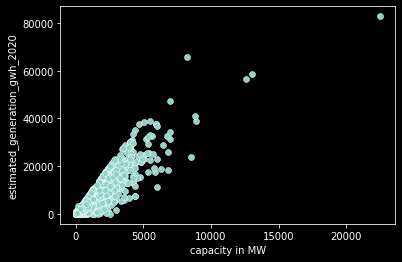

In [23]:
sns.scatterplot(data=power, x='capacity in MW', y='estimated_generation_gwh_2020')

The direct relationship is easy to see. Now let's see a box and whisker plot for fuel type, just for fun:

<AxesSubplot:xlabel='primary_fuel', ylabel='estimated_generation_gwh_2020'>

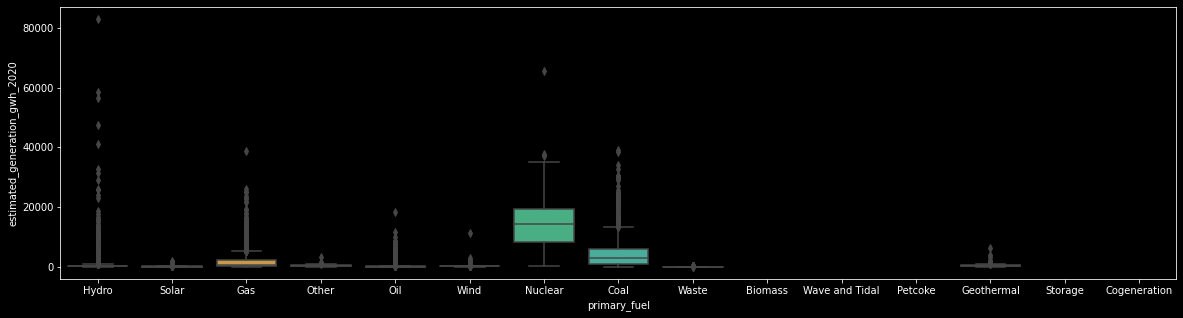

In [24]:
plt.figure(figsize=(20,5))
sns.boxplot(data=power, x='primary_fuel', y='estimated_generation_gwh_2020')

# Performance Metric
"estimated_generation_gwh_2020" (power generation) was the primary performance metric used in this project, because at the end of the day, efficiency and total power generation are the determining factors when it comes to power plants. A specific model wasn't exactly used. The data was traversed, and assumptioned were made based on apparent relationships between values. There were some unexpected results though; for example, USA being the most "green", and the fact that "green" power plants are in the majority.